<a href="https://colab.research.google.com/github/adityadhumal06/CNN_Cat_Dog_Classifier/blob/main/Cat_vs_Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 22.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.5MB/s]


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
# Import Libraries

In [5]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [30]:
# generators

In [31]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)


)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [32]:
# Normalize the Data

In [33]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

In [34]:
train_ds = train_ds.map(process)
validation_ds = val_ds.map(process)

In [35]:
# Create CNN Model

In [36]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [38]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [39]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.4634 - accuracy: 0.5870 - val_loss: 0.7493 - val_accuracy: 0.6428
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5730 - accuracy: 0.7004 - val_loss: 0.5330 - val_accuracy: 0.7200
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5341 - accuracy: 0.7425 - val_loss: 0.5313 - val_accuracy: 0.7364
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4507 - accuracy: 0.7910 - val_loss: 0.5728 - val_accuracy: 0.7284
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3990 - accuracy: 0.8259 - val_loss: 0.5416 - val_accuracy: 0.7732
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3246 - accuracy: 0.8607 - val_loss: 0.4556 - val_accuracy: 0.8096
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2512 - accuracy: 0.8965 - val_loss: 0.5311 - val_ac

In [40]:
tr_acc = history.history['accuracy']
ts_acc = history.history['val_accuracy']


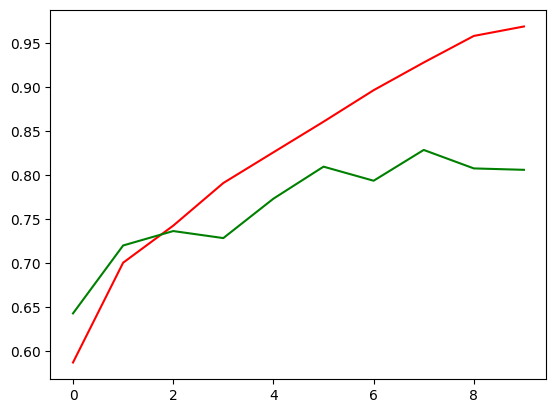

In [41]:
import matplotlib.pyplot as plt
plt.plot(tr_acc,color='red',label='train')
plt.plot(ts_acc,color='green',label='validation')

In [42]:
tr_loss = history.history['loss']
ts_loss = history.history['val_loss']

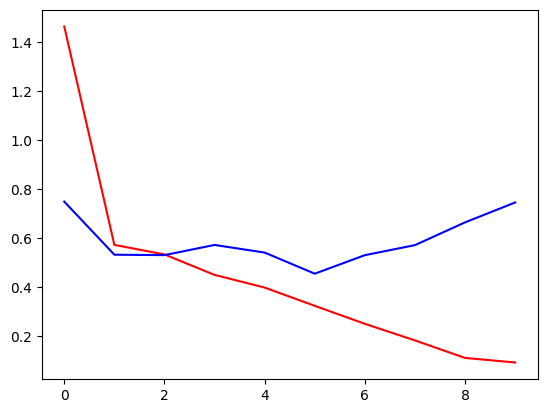

In [43]:
import matplotlib.pyplot as plt
plt.plot(tr_loss,label='train loss',color='red')
plt.plot(ts_loss,label='validation loss',color='blue')

In [44]:
# ways to reduce overfitting

# add more data
# Data Augmentation --> next video
# L1/L2 Regulrization
# Dropout
# Batch Norm
# Reduce Complexity

In [45]:
# Prediction

In [46]:
import cv2

In [47]:
test_img = cv2.imread('/content/labrador-retriever-1210559_640.jpg')

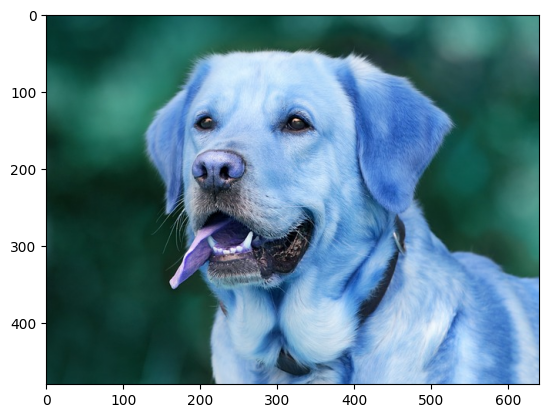

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(480, 640, 3)

In [51]:
test_img = cv2.resize(test_img,(256,256))

In [53]:
test_input = test_img.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 301ms/step


array([[0.]], dtype=float32)

In [56]:
test_img_cat = cv2.imread('/content/pexels-just-a-couple-photos-3777622.jpg')

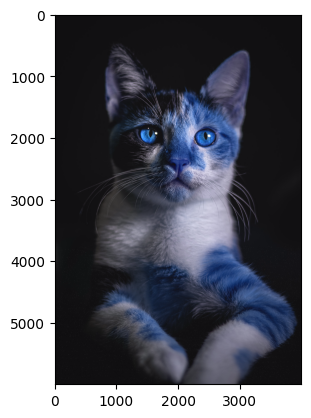

In [57]:
plt.imshow(test_img_cat)

In [58]:
test_img_cat.shape

(6000, 4000, 3)

In [59]:
test_img_cat = cv2.resize(test_img_cat,(256,256))

In [60]:
input_img_cat = test_img_cat.reshape((1,256,256,3))

In [61]:
model.predict(input_img_cat)

1/1 [==============================] - 0s 46ms/step


array([[0.]], dtype=float32)